<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/KMeansV3(7_clusters_with_labels_superimposed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def sil_scores(X, range_n_clusters ):
    result = []
    for n_clusters in range_n_clusters:
    #     X=data
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init=20, max_iter=500)
        cluster_labels = clusterer.fit_predict(X)



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        result.append(silhouette_avg)
    return result

def silhouette_plotter(X, range_n_clusters, tsne_X ):
    all_scores = []
    for n_clusters in range_n_clusters:
    #     X=data
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        all_scores.append(silhouette_avg)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)


        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / 8)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / 8)
        ax2.scatter(tsne_X[:, 0], tsne_X[:, 1], marker='.', s=30, lw=0, alpha=1,
                    c=colors, edgecolor='k')

            

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        #ax2.set_yscale('log')
        #ax2.set_xscale('log')
        #ax2.set_xlim(.0001,1000)
        #ax2.set_ylim(.0001,1000)
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return all_scores

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
raw_data = pd.read_csv('/content/gdrive/My Drive/project_data/final_data.csv')

In [0]:
raw_data.head(5)

,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved
0,0xd4f8e83864c80ea703dd148c78b937cbec200243,9,0.027000,4.750000e+15,97,0.019448,9.393942e-12,9.393942e-12,1.156452e+05,1.434797e+04,2,48.500000,9.000000,0.009724,0.013500
1,0xd9052a62ee61eec200c1972aa2a19fa3d5396b6d,14,0.010342,2.608713e+14,32,0.000000,1.870353e-07,1.870353e-07,1.042143e+06,4.736983e+05,6,5.500000,2.500000,0.000000,0.001724
2,0xe6b4a32cc822980d652bb185b33db6be69d39a13,17,16.776854,8.531440e+17,86,21.009302,4.639691e+04,4.260856e+04,1.320557e+06,1.653896e+05,5,21.500000,3.400000,4.201860,3.355371
3,0x9f265a9675dea8f97139015f62c84af1f6d687ae,15,2.100000,6.340620e+14,3,2.099000,2.000000e+02,2.000000e+02,3.701651e+05,1.252319e+06,4,1.500000,5.000000,0.524750,0.525000
4,0xbad9298ef9a0c40ed1fb299a5e42269589aa15af,142,17.850288,1.078000e+16,57,17.813826,3.000000e+00,1.000000e+02,2.403451e+05,5.987940e+05,14,4.384615,10.923077,1.272416,1.275021


In [0]:
data = raw_data.iloc[:30000,1:]

In [0]:
 data_with_labels = pd.read_csv('/content/gdrive/My Drive/project_data/final_data_of_labels.csv')

 without_address = data_with_labels.iloc[:,1:]
 without_address.head()
 frames = [without_address,data]
 data = pd.concat(frames)
 data.head()
 

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved
0,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649
1,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571
2,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453
3,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990
4,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007


In [0]:

#number of PCA features is full reconstruction, for now

#num_clusters = 7
num_features = 14

In [0]:
log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
power_transform = PowerTransformer(standardize=False)
scale = StandardScaler()
pca =PCA(n_components=num_features)
# cl = KMeans(num_clusters)
#build pipeline
pipe = Pipeline([('log', power_transform ),
                 ('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


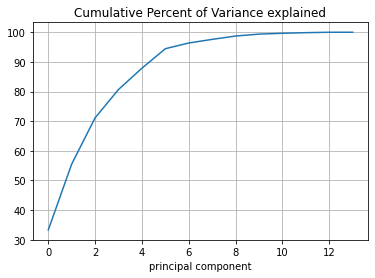

In [0]:
#percent of variance explained by each component

plt.plot(np.arange(pca.n_components_) ,np.cumsum(pca.explained_variance_ratio_)*100)
plt.grid(b=True)
plt.xlabel('principal component')
plt.title('Cumulative Percent of Variance explained')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Text(0.5, 1.0, 'Calinski Harabaz Scores')

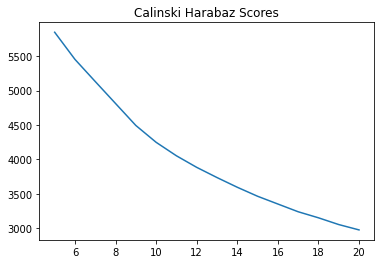

In [0]:
#scoring metric?
from sklearn.metrics import calinski_harabaz_score as ch_score
clusters = [5,6,7,9,10,11,12,13,14,15,16,17,18,19,20]
scores = []
inertias = []
for c in clusters:
    cl_n = KMeans(c).fit(results)
    score = ch_score(results, cl_n.labels_)
    scores.append(score)
    inertias.append(cl_n.inertia_)


plt.plot(clusters, scores)
plt.title('Calinski Harabaz Scores')

Text(0, 0.5, 'within cluster sum of squares')

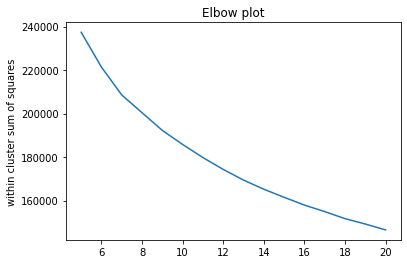

In [0]:
#elbow plot
plt.plot(clusters,inertias)
plt.title('Elbow plot')
plt.ylabel('within cluster sum of squares')

In [0]:
#optimal number of clusters is around 40
cl = KMeans(7)
cl.fit(results)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#outlier removal


def remove_outliers(results, cl, threshold):
    '''
    returns subset of results, and associated labels as a tuple
    takes results and a fit KMeans cluster object'''
    
    new_labels = []
    new_results = []
    
    
    #code for deciding what clusters to keep
    for i, center in enumerate(cl.cluster_centers_):
        within_cluster_results = results[cl.labels_==i]
        centroid = cl.cluster_centers_[i]
        #calc std vectors
        stdev = np.std(within_cluster_results, axis=0)
       
        keep = np.linalg.norm((centroid - within_cluster_results), axis=1) < threshold*np.linalg.norm(stdev)
        new_results.append(within_cluster_results[keep])
        #add labels?
        new_labels.extend([i for j in range(len(within_cluster_results[keep]))])
    return np.vstack(new_results), np.array(new_labels)


In [0]:
thresholds = np.linspace(.3,3, 20)

test = [remove_outliers(results, cl,t) for t in thresholds]

scores= []
for (res, labels) in test:
    
    score = ch_score(res, labels)
    scores.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Text(0.5, 1.0, 'Calinski Harabaz Scores as std threshold changes')

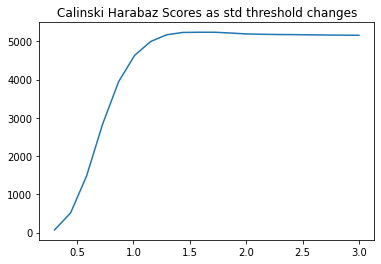

In [0]:
plt.plot(thresholds, scores)
plt.title('Calinski Harabaz Scores as std threshold changes')

In [0]:
#empirical best threshold 1 stdev
newresults, labels = remove_outliers(results, cl,0.9)


In [0]:

#subset results for tsne
max_size = len(results)
subset_results = []
lbls = []
for c in np.unique(cl.labels_):
    mask = (cl.labels_==c)
    c_size = np.sum(mask)
    if c_size < max_size:
        lbls.extend(list(cl.labels_[cl.labels_==c]))
        subset_results.append(results[mask])
lbls=np.array(lbls)
subset_results=np.vstack(subset_results)

In [0]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(subset_results)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30123 samples in 0.061s...
[t-SNE] Computed neighbors for 30123 samples in 8.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30123
[t-SNE] Computed conditional probabilities for sample 2000 / 30123
[t-SNE] Computed conditional probabilities for sample 3000 / 30123
[t-SNE] Computed conditional probabilities for sample 4000 / 30123
[t-SNE] Computed conditional probabilities for sample 5000 / 30123
[t-SNE] Computed conditional probabilities for sample 6000 / 30123
[t-SNE] Computed conditional probabilities for sample 7000 / 30123
[t-SNE] Computed conditional probabilities for sample 8000 / 30123
[t-SNE] Computed conditional probabilities for sample 9000 / 30123
[t-SNE] Computed conditional probabilities for sample 10000 / 30123
[t-SNE] Computed conditional probabilities for sample 11000 / 30123
[t-SNE] Computed conditional probabilities for sample 12000 / 30123
[t-SNE] Computed conditional probabilities for sa

For n_clusters = 7 The average silhouette_score is : 0.16376421899404045


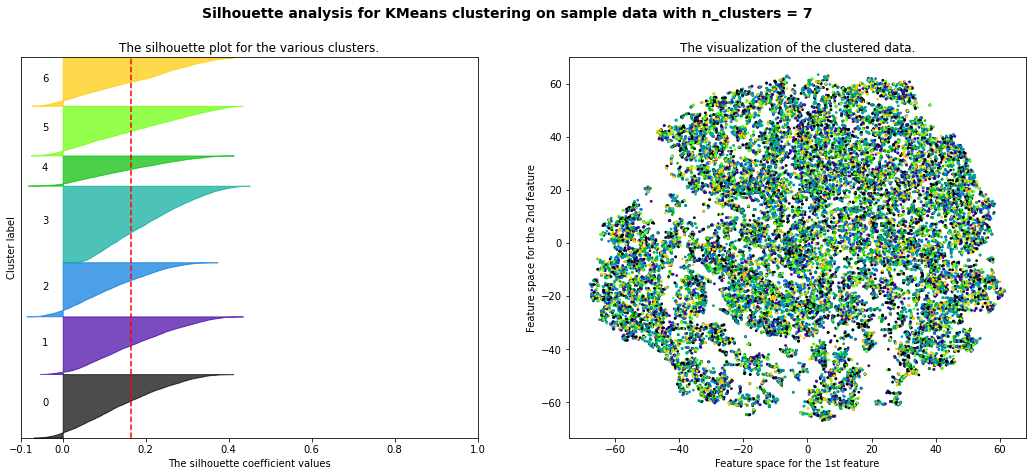

[0.16376421899404045]

In [0]:
X=results

range_n_clusters = [7]
silhouette_plotter(X, range_n_clusters,tsne_results)

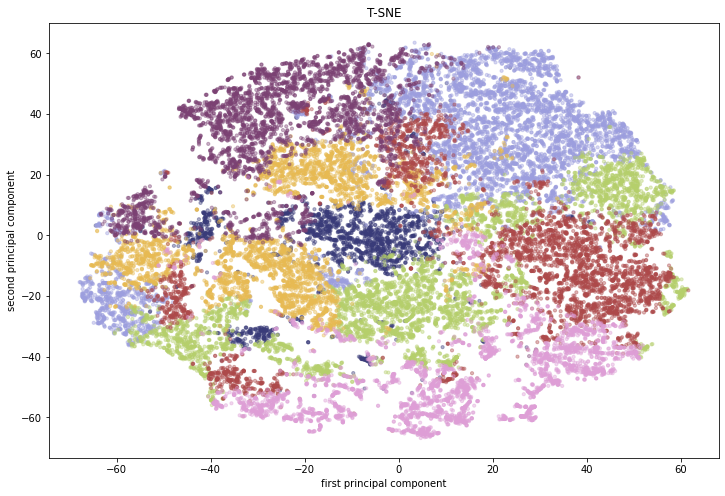

In [0]:
plt.figure(figsize=(12,8))

plt.scatter(tsne_results[:,0], tsne_results[:,1], s=10,c=lbls,cmap='tab20b', alpha=.4)


# leg = plt.legend()




# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

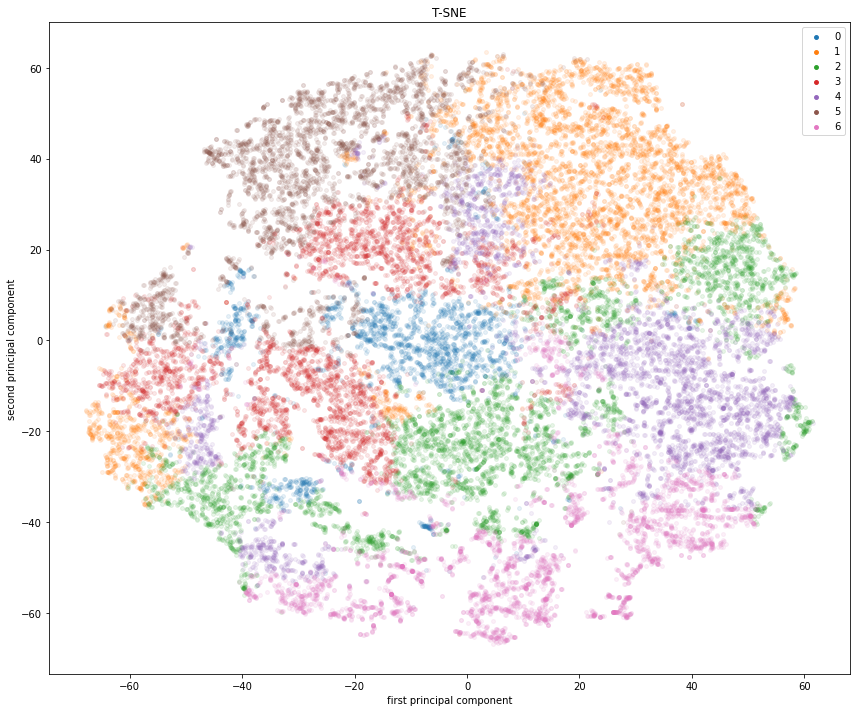

In [0]:
plt.figure(figsize=(12,10))
for c in np.unique(lbls):
    mask = lbls==c
    if np.sum(mask) <0:
        lbl = '_nolegend_'
    else:
        lbl = c
    plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=15,alpha=.1,label=lbl)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.tight_layout()

In [0]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# for c in np.unique(cl.labels_):
#     mask = cl.labels_==c
#     if np.sum(mask) <50:
#         lbl = '_nolegend_'
#     else:
#         lbl = c
#     ax.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], tsne_results[mask][:,2], s=10, alpha=.01,label=lbl)
# leg = plt.legend()
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
# ax.set_xlabel('first principal component')
# ax.set_ylabel('second principal component')
# ax.set_zlabel('third principal component')
# ax.view_init(elev=30, azim=0)
# plt.show()

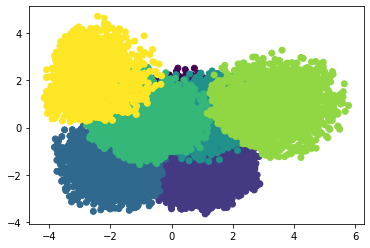

In [0]:
plt.scatter(newresults[:,0],newresults[:,1],c=labels)
# plt.xlim(0,10)
# plt.ylim(-10,10)

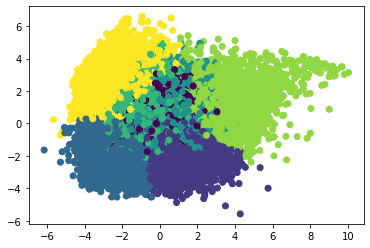

In [0]:
plt.scatter(results[:,0],results[:,1],c=cl.labels_)
# plt.xlim(-10,100)
# plt.ylim(-15,10)

In [0]:
# #recluster after changes
# cl = KMeans(20).fit(results)
newcl = KMeans(40).fit(newresults)


In [0]:
# %matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(results[:,0],results[:,1],results[:,2],c=cl.labels_)

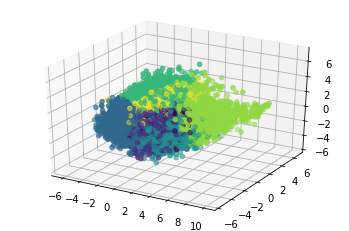

In [0]:
# plt.scatter(newresults[:,0],newresults[:,1],c=newcl.labels_)
# plt.xlim(-10,100)
# plt.ylim(-15,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results[:,0],results[:,1],results[:,2],c=cl.labels_)

# ax.set_xlim3d(-10,10)
# ax.set_ylim3d(-15,10)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(newresults[:,0],newresults[:,1],newresults[:,2],c=newcl.labels_)

In [0]:
len(centroids[0])

14

In [0]:
len(data.columns)

14

In [0]:
# # %matplotlib widget
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(newresults[:,0],newresults[:,1],newresults[:,2],c=newcl.labels_)
# # ax.set_xlim3d(-1,1)
# # ax.set_ylim3d(-3,3)
# # ax.view_init(elev=-0, azim=90)
# # for ii in range(10,360,10):
# #     ax.view_init(elev=10, azim=ii)
# #     fig.savefig("movie/movie{}.png".format(ii))


# #transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
df_summary = pd.DataFrame(centroids, columns = data.columns)

In [0]:
c = cl.cluster_centers_
#transform back to real numbers


In [0]:
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes

In [0]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
1,2.780239,1.679564,3.227787e+50,21.558616,1.998051,6.571769e+02,3.951784e+02,3.218272e+03,1.879657e+03,3.215046,4.489736,2.515495,0.764339,0.645617,6057.0
2,2.317711,1.082786,6.231516e+89,30.988330,1.441654,1.086989e+08,5.987016e+07,1.613357e+137,6.708487e+31,25.585760,3.066899,0.889381,-0.074539,-0.144016,5058.0
4,2.809510,7.450335,9.089308e+13,2.444501,6.316659,6.911997e+07,2.109749e+08,2.330725e+35,9.586904e+65,7.054146,0.729457,2.149845,1.177448,1.323806,4564.0
3,1.610825,11.694765,1.570428e+17,6.396960,16.261356,1.060059e+05,4.361499e+05,1.263096e+90,2.477342e+27,-0.072081,2.645080,1.152666,6.632209,5.444785,4282.0
5,2.266061,10.438493,7.878684e+258,3.973304,6.838305,1.827761e+04,4.352417e+03,2.286292e+62,1.187271e+37,3.865223,1.486789,1.625476,1.692706,2.140566,3929.0
6,2.379650,23.877157,1.806135e+42,3.371257,19.444653,4.229603e+02,2.823268e+03,1.659777e+37,-1.000000e+00,32.801730,0.683532,0.773625,1.554790,1.659827,3835.0
0,2.793741,553.583018,3.262730e+85,24.337360,687.474759,3.420011e+05,2.031444e+05,2.129876e+84,1.167546e+35,20.339067,2.767220,1.607918,17.870961,15.364482,2398.0
7,1.808860,14.549010,3.012610e+57,18.154664,21.755631,1.424936e+08,-9.964832e-01,1.919265e+04,7.898382e+61,25.962575,1.714225,1.457025,1.586057,1.175378,NaN
8,1.954841,10.335074,1.367076e+75,23.463684,18.141417,-9.980145e-01,3.140994e+08,2.642333e+11,4.245235e+66,20.229970,1.764078,1.368096,1.751280,1.185203,NaN
9,1.868130,16.966615,1.321854e+55,10.620830,18.175657,3.331564e+02,2.207842e+03,1.904402e+164,6.563631e+21,25.210713,1.010022,3.390637,1.242241,1.128331,NaN


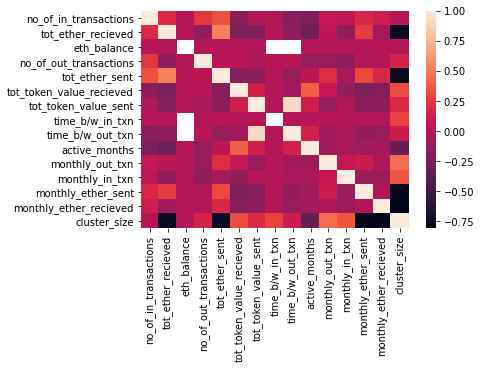

In [0]:
import seaborn as sns
sns.heatmap(df_summary.corr())

In [0]:

arr = df_summary.values

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


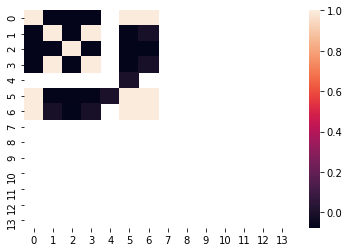

In [0]:
sns.heatmap(np.corrcoef(arr, rowvar=True))

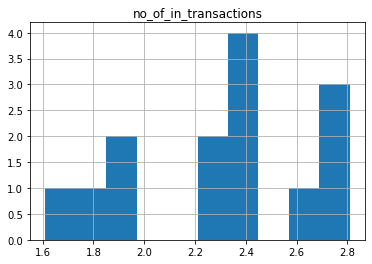

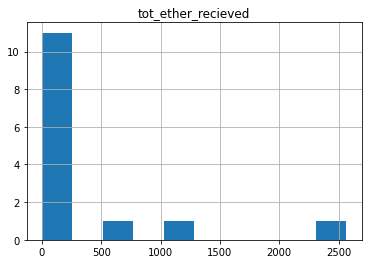

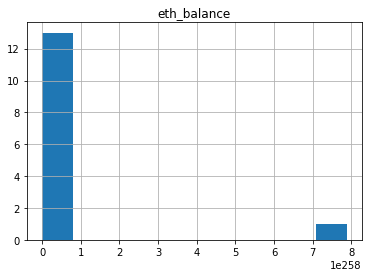

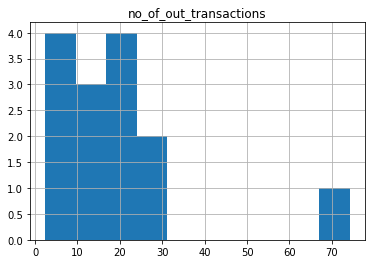

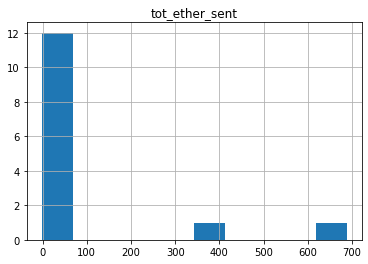

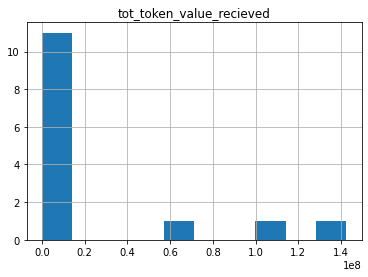

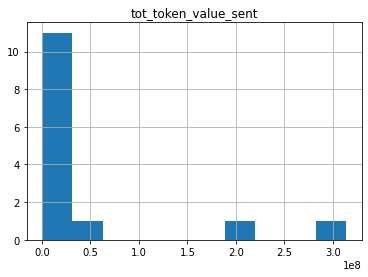

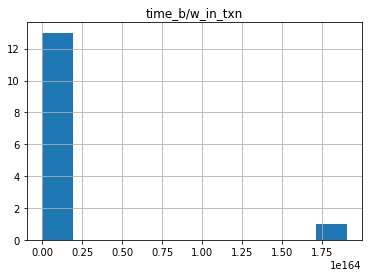

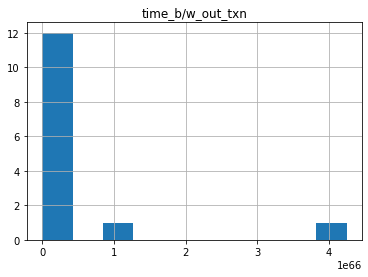

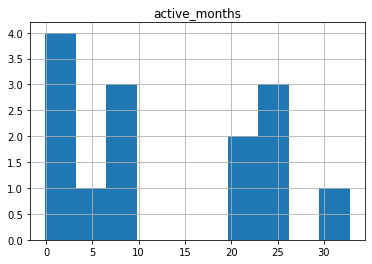

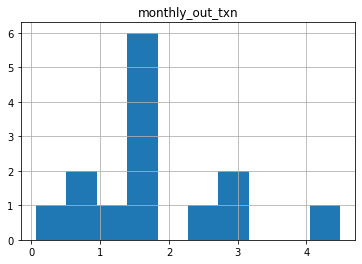

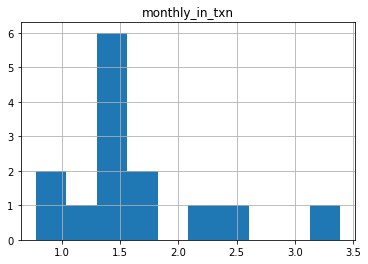

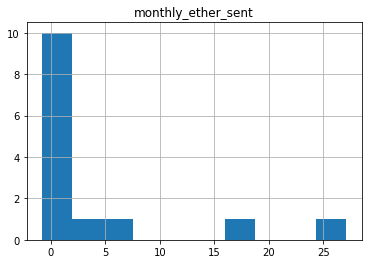

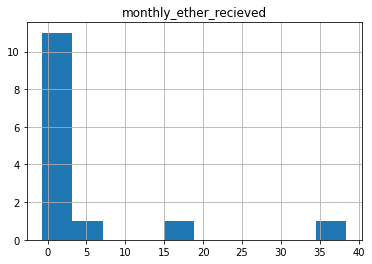

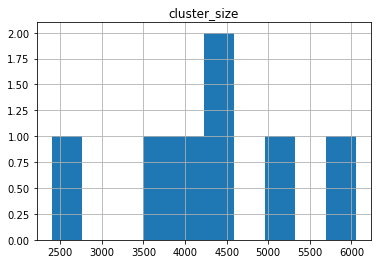

In [0]:
for col in df_summary.columns:
    
      df_summary[col].hist()
      plt.title(col)
      plt.show()

In [0]:
p = PCA(n_components=3)

In [0]:
vectors = p.fit_transform(arr[:8,:])

ValueError: ignored

In [0]:
xs = vectors[:,0]
ys = vectors[:,1]
zs = vectors[:,2]

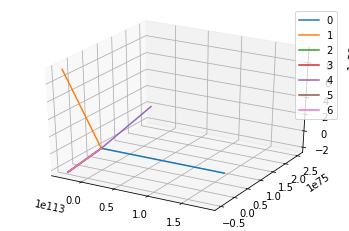

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,(x,y,z) in enumerate(zip(xs,ys,zs)):
    ax.plot([0,x], [0,y],[0,z], label=i)
plt.legend()

In [0]:
data = raw_data.iloc[:30000,:]
 
result_data =  data = pd.concat([data_with_labels,data])

Points_with_labels = pd.DataFrame(result_data, columns = raw_data.columns)
Points_with_labels['labels'] = cl.labels_
Points_with_labels.head()

,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
0,0x1d1c9f70a68c129096d8181529041843e8bc1a30,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649,4
1,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571,5
2,0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453,5
3,0x8b99f3660622e21f2910ecca7fbe51d654a1517d,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990,0
4,0x15c5312e24482547ff35899afedcaeb572ecb029,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007,5


In [0]:
label_address = list(data_with_labels["address"])
filtered_label_address = Points_with_labels[Points_with_labels.address.isin(label_address)]
filtered_label_address.groupby('labels').describe()
  

no_of_in_transactions                 ... monthly_ether_recieved              
                       count           mean  ...                    75%           max
labels                                       ...                                     
0                        1.0      55.000000  ...               2.867990  2.867990e+00
1                        8.0       8.250000  ...           13900.604490  6.112246e+04
2                       12.0       1.916667  ...               0.304119  4.006667e-01
3                        1.0       6.000000  ...               2.619650  2.619650e+00
4                       15.0      10.866667  ...               0.814816  1.822000e+00
5                       79.0  125607.189873  ...           62048.822534  1.099418e+06
6                        7.0       1.142857  ...               0.049302  9.000000e-02

[7 rows x 112 columns]

In [0]:
labels = pd.read_csv('/content/gdrive/My Drive/project_data/label_cate.csv')
labels['address'] = labels["Addreses"]



In [0]:
merged_label =pd.merge(labels, filtered_label_address, on='address', how='inner')


In [0]:
a = pd.DataFrame(merged_label.loc[merged_label['labels']== 1], columns=merged_label.columns)
print(max(set(list(a["Category"])), key = list(a["Category"]).count))
a.head(20)

Coinone


,Unnamed: 0,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
4,26,0x44fcfabfbe32024a01b778c025d70498382cced0,BAT: Wallet,Basic-Attention-Token,0x44fcfabfbe32024a01b778c025d70498382cced0,6,77346.252145,0.000000e+00,26,134990.958281,4.212388e+07,2.500000e+03,1.043674e+07,3.404280e+06,16,1.200000,2.000000,8436.934893,4834.140759,1
23,105,0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40,Coinone 2,Coinone,0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40,13,280000.984581,2.800010e+23,4,0.000000,1.157921e+41,1.000001e+07,4.179546e+06,4.688348e+06,8,1.857143,2.000000,0.000000,35000.123073,1
24,106,0x35da6abcb08f2b6164fe380bb6c47bd8f2304d55,Coinone: Old Address 1,Coinone,0x35da6abcb08f2b6164fe380bb6c47bd8f2304d55,11,550102.120433,0.000000e+00,17,830102.978914,6.460948e+05,9.965272e+04,8.362322e+06,3.230872e+06,9,2.200000,4.250000,92233.664324,61122.457826,1
29,112,0x88e343f4599292c2cffe683c1bb93cd3480bdbab,PXN: Cold Wallet,Cold-Wallet,0x88e343f4599292c2cffe683c1bb93cd3480bdbab,4,48072.021401,8.061814e+21,22,40010.199766,1.157921e+41,1.638000e+08,1.769929e+07,3.198936e+06,7,1.333333,3.142857,5715.742824,6867.431629,1
53,236,0x9f5ca0012b9b72e8f3db57092a6f26bf4f13dc69,GBX,GBX,0x9f5ca0012b9b72e8f3db57092a6f26bf4f13dc69,23,3607.151085,4.670623e+20,52,3140.036605,3.638395e+08,1.208252e+08,2.490398e+06,1.134695e+06,19,1.916667,2.736842,165.265084,189.850057,1
64,281,0x0a869d79a7052c7f1b55a8ebabbea3420f0d1e13,Kraken 2,Kraken,0x0a869d79a7052c7f1b55a8ebabbea3420f0d1e13,1,99.999413,1.312830e+23,12215,1297.686900,1.157921e+41,2.003306e+06,0.000000e+00,8.586971e+03,12,1.000000,1017.916667,108.140575,8.333284,1
84,352,0x5b3256965e7c3cf26e11fcaf296dfc8807c01073,OpenSea: Wallet,OpenSea,0x5b3256965e7c3cf26e11fcaf296dfc8807c01073,5,60.192206,2.913008e+20,399,2659.295078,8.260859e+05,1.911586e+05,8.459409e+06,1.785704e+05,26,1.666667,15.346154,102.280580,2.315085,1
89,371,0x5d509a25f25190e77a1e46e72333788b1f069ce1,Counter Network,OTC,0x5d509a25f25190e77a1e46e72333788b1f069ce1,3,171.801700,9.509600e+13,339,361.113747,4.719092e+03,4.597614e+03,7.840453e+06,1.086110e+05,16,1.000000,22.600000,22.569609,10.737606,1


In [0]:
b =pd.DataFrame(merged_label.loc[merged_label['labels']== 0], columns=merged_label.columns)
print(max(set(list(b["Category"])), key = list(b["Category"]).count))
b.head(20)

Charity


,Unnamed: 0,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
13,73,0x8b99f3660622e21f2910ecca7fbe51d654a1517d,Binance Charity,Charity,0x8b99f3660622e21f2910ecca7fbe51d654a1517d,55,40.15186,3.103932e+19,28,10.105297,1.262155e+07,138258.682423,824758.618182,1.212605e+06,14,4.583333,4.0,0.721807,2.86799,0


In [0]:
c =pd.DataFrame(merged_label.loc[merged_label['labels']== 2], columns=merged_label.columns)
print(max(set(list(c["Category"])), key = list(c["Category"]).count))
c.head(20)

MESG


,Unnamed: 0,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
34,165,0xc447fcaf1def19a583f97b3620627bf69c05b5fb,Curve.fi: Deployer,Curve-fi,0xc447fcaf1def19a583f97b3620627bf69c05b5fb,2,1.217516,7.515536e+17,107,0.040000,1.130478e+02,5.336842e+00,3.477103e+06,7.745867e+04,5,1.000000,26.750000,0.008000,0.243503,2
66,286,0x2e7542ec36df6429d8c397f88c4cf0c925948f44,Kraken: Deployer,Kraken,0x2e7542ec36df6429d8c397f88c4cf0c925948f44,5,1.807210,0.000000e+00,28,1.744709,1.106045e+00,4.061046e-04,1.417208e+07,3.611099e+06,8,1.666667,4.000000,0.218089,0.225901,2
74,300,0x6a0afe6f45a878100480f312b585aa0d752d4d2d,Liquid: Gram Token Sale Proceeds,Liquid,0x6a0afe6f45a878100480f312b585aa0d752d4d2d,1,0.003000,2.536874e+15,4,0.000000,8.730000e+02,4.119838e-06,0.000000e+00,3.116048e+06,2,1.000000,2.000000,0.000000,0.001500,2
76,319,0xd3bc9441cf03872211e20e3b65753b987e4902c4,MESG: Partners & Bounties,MESG,0xd3bc9441cf03872211e20e3b65753b987e4902c4,1,0.100000,8.940309e+16,16,0.000000,1.270735e+07,8.341313e+06,0.000000e+00,1.912149e+06,9,1.000000,2.000000,0.000000,0.011111,2
77,321,0xc99dd69a565d9d64a8b1ba2d76cf49023913bdcc,MESG: Sale Allocation,MESG,0xc99dd69a565d9d64a8b1ba2d76cf49023913bdcc,1,0.100000,8.757961e+16,21,0.000000,1.562500e+08,4.231538e+07,0.000000e+00,1.168863e+06,11,1.000000,2.100000,0.000000,0.009091,2
78,322,0xc3f32eac394231fa48197b6751dfab3ad5d98f07,MESG: Team & Founders,MESG,0xc3f32eac394231fa48197b6751dfab3ad5d98f07,1,0.100000,9.705036e+16,9,0.000000,3.125000e+07,1.366144e+07,0.000000e+00,2.035466e+06,9,1.000000,1.125000,0.000000,0.011111,2
92,383,0x1074f62d7019c3184a2f7ea8c6a8acd6780beb48,Gitcoin Grants: POA Network,POA-Network,0x1074f62d7019c3184a2f7ea8c6a8acd6780beb48,3,1.119713,4.210000e+13,10,1.116927,1.004100e+03,1.002000e+03,7.422888e+06,2.226833e+06,3,1.500000,3.333333,0.372309,0.373238,2
93,387,0xbf3d6f830ce263cae987193982192cd990442b53,POA: Deployer,POA-Network,0xbf3d6f830ce263cae987193982192cd990442b53,2,2.000000,1.703422e+17,63,1.651633,2.414094e+02,1.256093e+02,1.028714e+06,3.202402e+05,7,1.000000,9.000000,0.235948,0.285714,2
98,412,0xefc534c47d753f94944b734d2c546cb1fba8904e,Resfinex: Founding Team,Resfinex,0xefc534c47d753f94944b734d2c546cb1fba8904e,3,1.202000,0.000000e+00,7,1.201367,4.000000e-05,4.957000e-01,2.616689e+06,1.123333e+06,3,1.500000,2.333333,0.400456,0.400667,2
101,421,0xbd2efc57869a44a942cf4f693422c932a5e3e33f,Scroll Network: Escrow 2,Scroll-Network,0xbd2efc57869a44a942cf4f693422c932a5e3e33f,1,0.134020,1.309609e+17,2,0.000000,3.000010e+08,6.400360e+05,0.000000e+00,1.512434e+06,3,1.000000,1.000000,0.000000,0.044673,2


In [0]:
d =pd.DataFrame(merged_label.loc[merged_label['labels']== 3], columns=merged_label.columns)
print(max(set(list(d["Category"])), key = list(d["Category"]).count))
d.head(20)

Syscoin


,Unnamed: 0,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
106,457,0x8d827cf5515718a79be1dc38152873bc0c1ca263,Syscoin: Deployer,Syscoin,0x8d827cf5515718a79be1dc38152873bc0c1ca263,6,10.4786,4.211871e+17,135,12.262069,165496.266489,0.2664,1524927.0,67786.903704,4,1.5,33.75,3.065517,2.61965,3


In [0]:
e =pd.DataFrame(merged_label.loc[merged_label['labels']== 4], columns=merged_label.columns)
print(max(set(list(e["Category"])), key = list(e["Category"]).count))
e.head(20)

CoinMarketFeed


,Unnamed: 0,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
2,12,0x5d46594e6b0508326eb921790eb91d546f5daedb,pclab.io,Advertising,0x5d46594e6b0508326eb921790eb91d546f5daedb,10,6.715119,1.703593e+18,69,4.971000,2.530817e+07,1.082655e+07,3.962936e+06,544670.637681,16,1.250000,4.600000,0.310687,0.419695,4
3,25,0x7c31560552170ce96c4a7b018e93cddc19dc61b6,BAT: UGP Reserve,Basic-Attention-Token,0x7c31560552170ce96c4a7b018e93cddc19dc61b6,11,23.524091,1.962163e+18,202,21.239255,3.663980e+08,3.260926e+08,6.415074e+06,448732.589109,28,2.200000,7.214286,0.758545,0.840146,4
19,99,0x7e760ad2a3e901bf034daa53222286524a4fbcf6,CoinMarketFeed: Airdrop & Liquidity,CoinMarketFeed,0x7e760ad2a3e901bf034daa53222286524a4fbcf6,2,0.250111,1.729654e+17,27,0.070000,5.010578e+07,1.027000e+06,8.591425e+05,268431.703704,3,2.000000,9.000000,0.023333,0.083370,4
21,102,0xb12846ea71cce9d334648d1dde8cadb56d475076,CoinMarketFeed: Token Sale,CoinMarketFeed,0xb12846ea71cce9d334648d1dde8cadb56d475076,3,0.346000,4.440207e+15,35,0.250272,2.153787e+59,1.000000e+09,8.623067e+04,117730.514286,3,3.000000,11.666667,0.083424,0.115333,4
33,129,0xed48484223e6cd3347aea641bc299e43282634a0,CryptoAtoms: Deployer,CryptoAtoms,0xed48484223e6cd3347aea641bc299e43282634a0,3,0.086340,7.673722e+17,484,0.140140,1.410001e+02,2.053500e-14,1.038411e+07,113226.012397,22,1.500000,22.000000,0.006370,0.003925,4
43,180,0x8f3ab2c3b651382b07a76653d2be9eb4b87e1630,YOOBTC 1,Derivatives,0x8f3ab2c3b651382b07a76653d2be9eb4b87e1630,20,6.549113,7.416926e+17,1597,5.617546,2.375660e+05,2.177507e+05,2.357898e+05,6160.361929,5,10.000000,319.400000,1.123509,1.309823,4
48,200,0xb1f919db227048a1a45883138b9d12b9ef03df25,DutchX: Deployer,DutchX,0xb1f919db227048a1a45883138b9d12b9ef03df25,6,5.600000,1.931367e+17,508,3.277480,1.133237e+02,1.337651e+01,5.238257e+06,65298.746063,10,1.500000,56.444444,0.327748,0.560000,4
58,253,0x2522eb1976d9515cdd97c3003c1f2790fbf83b10,XWallet 1,Hot-Wallet,0x2522eb1976d9515cdd97c3003c1f2790fbf83b10,4,10.000220,2.483402e+18,13063,0.000220,8.793759e+07,8.699573e+07,6.927262e+05,2396.514734,13,2.000000,1005.153846,0.000017,0.769248,4
80,337,0x00ee047a66d5cff27587a61559138c26b62f7ceb,Nexo 1,Nexo,0x00ee047a66d5cff27587a61559138c26b62f7ceb,4,5.012374,4.541961e+18,409,0.105000,1.873557e+08,1.420755e+08,3.147655e+06,37171.701711,7,1.333333,58.428571,0.015000,0.716053,4
81,338,0xffec0067f5a79cff07527f63d83dd5462ccf8ba4,Nexo 2,Nexo,0xffec0067f5a79cff07527f63d83dd5462ccf8ba4,5,44.496000,6.297487e+19,82905,31.000000,5.540958e+09,8.294450e+08,1.153267e+07,743.846309,25,1.000000,3316.560000,1.240000,1.779840,4


In [0]:
f =pd.DataFrame(merged_label.loc[merged_label['labels']== 5], columns=merged_label.columns)
print(max(set(list(f["Category"])), key = list(f["Category"]).count))
f.head(20)


Derivatives


,Unnamed: 0,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
0,4,0xa36a81e47d032cb5608175cf884d079ff7b2fb42,0xUniverse: Wallet 1,0xUniverse,0xa36a81e47d032cb5608175cf884d079ff7b2fb42,15,4.920000e+01,1.912256e+18,6562,4.186386e+02,1.665267e+04,2.639419e-10,3.839832e+06,8899.497867,21,2.142857,312.476190,19.935172,2.342857,5
1,9,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,ABCC,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,20099,1.656953e+05,9.487106e+19,37999,1.655905e+05,4.866121e+09,2.713457e+09,3.089994e+03,1635.020474,25,803.960000,1519.960000,6623.621234,6627.811383,5
5,28,0xce1bf8e51f8b39e51c6184e059786d1c0eaf360f,Bgogo 2,Bgogo,0xce1bf8e51f8b39e51c6184e059786d1c0eaf360f,7639,9.957230e+04,2.520344e+17,95,9.957200e+04,4.496334e+08,4.496257e+08,3.732771e+03,459207.536842,13,848.777778,7.307692,7659.384823,7659.407687,5
6,34,0xe79eef9b9388a4ff70ed7ec5bccd5b928ebb8bd1,BitMart,BitMart,0xe79eef9b9388a4ff70ed7ec5bccd5b928ebb8bd1,61261,1.325757e+05,1.999790e+17,105860,1.325644e+05,9.109262e+58,2.284072e+10,1.160558e+03,671.319516,21,3224.263158,5040.952381,6312.591372,6313.129230,5
7,36,0x03bdf69b1322d623836afbd27679a1c0afa067e9,Bitmax 1,BitMax-io,0x03bdf69b1322d623836afbd27679a1c0afa067e9,45492,4.689207e+05,4.884396e+17,105313,4.691210e+05,8.121125e+09,4.861883e+09,8.016777e+02,479.098639,17,3032.800000,6194.882353,27595.354237,27583.568582,5
8,176,0x03bdf69b1322d623836afbd27679a1c0afa067e9,Bitmax 1,Derivatives,0x03bdf69b1322d623836afbd27679a1c0afa067e9,45492,4.689207e+05,4.884396e+17,105313,4.691210e+05,8.121125e+09,4.861883e+09,8.016777e+02,479.098639,17,3032.800000,6194.882353,27595.354237,27583.568582,5
9,37,0x4b1a99467a284cc690e3237bc69105956816f762,Bitmax 2,BitMax-io,0x4b1a99467a284cc690e3237bc69105956816f762,8744,1.530964e+05,3.829955e+20,738,1.527130e+05,4.232264e+09,3.240477e+09,6.314880e+03,70221.951220,22,397.454545,41.000000,6941.499641,6958.929391,5
10,38,0x986a2fca9eda0e06fbf7839b89bfc006ee2a23dd,Bitmax 3,BitMax-io,0x986a2fca9eda0e06fbf7839b89bfc006ee2a23dd,13230,6.627298e+05,2.454042e+21,65085,6.616846e+05,2.028899e+09,1.842212e+09,1.414759e+03,287.506973,8,1653.750000,8138.000000,82710.579733,82841.229158,5
11,46,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,Bittrex 1,Bittrex,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,235505,3.885884e+06,9.194653e+22,8884302,3.417421e+07,1.157921e+41,1.538232e+11,6.247532e+02,16.613917,57,4528.942308,155866.157895,599547.499766,68173.411602,5
12,48,0x66f820a414680b5bcda5eeca5dea238543f42054,Bittrex 3,Bittrex,0x66f820a414680b5bcda5eeca5dea238543f42054,16,1.650603e+06,7.750006e+23,50,8.756021e+05,1.157921e+41,1.448997e+09,2.269012e+06,504374.620000,11,2.666667,6.250000,79600.189940,150054.790741,5


In [0]:
g =pd.DataFrame(merged_label.loc[merged_label['labels']== 6], columns=merged_label.columns)
print(g.head(20))
print(max(set(list(g["Category"])), key = list(g["Category"]).count))

     Unnamed: 0  ... labels
16           94  ...      6
20          100  ...      6
28          111  ...      6
35          166  ...      6
61          257  ...      6
87          368  ...      6
103         433  ...      6

[7 rows x 20 columns]
Cold-Wallet


In [0]:
frames = [a,b,c,d,e,f,g]
result = pd.concat(frames)


In [0]:
result

,address
9,0x53aede30f584e9d9a7548ae8794526e85bba6bdd
15,0x4e2811bde12ca9ec487c91bcdded6122a34eb779
24,0x2b85af3042ff6cad74ef8273651f2972207342f2
29,0xae99adfa7cf3b29fca3ea0156bf31e0164a97d41
30,0x436911e6af1c5957c8e5c4d1daff8fda4817818c
...,...
11767,0x04abab4612ecad92ac6273c70fc77ddd73bb6726
11777,0xbce04cf6db8c0ecc7a210c70836f57800ac45f0a
11797,0xe41945b41d5c3984af37d32ad0724e962fd4df41
11799,0x6ca6bda69718bbe52e6d566528854c8c2030a9a9


In [0]:
result.to_csv(r'/content/gdrive/My Drive/project_data/data_with_labels.csv', index = False)

In [0]:
Points_with_labels.to_csv(r'/content/gdrive/My Drive/project_data/data_with_cluster_name.csv', index = True)